<a href="https://colab.research.google.com/github/sr606/Python-Practice/blob/main/Feature_Engineering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# impoting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
Data =  [10, 20, 20 , 40, 50, 60, 70, 60, 50, 40, 30, 20, 10, 10, 10, 20, 20, 30, 40, 50, 50, 60, 60, 80, 90, 100, 100, 120, 100, 90, 80]

<Axes: ylabel='Count'>

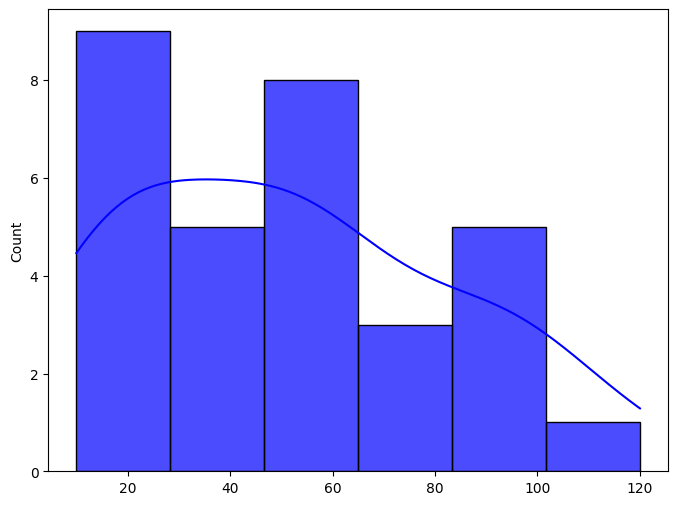

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(Data, kde=True, color='blue', edgecolor='black', alpha=0.7)

In [7]:
from scipy.stats import kurtosis

# Provided data
Data = [10, 20, 20, 40, 50, 60, 70, 60, 50, 40, 30, 20, 10, 10, 10, 20, 20, 30, 40, 50, 50, 60, 60, 80, 90, 100, 100, 120, 100, 90, 80]

# Calculate kurtosis
kurt_value = kurtosis(Data, fisher=True)  # fisher=True for excess kurtosis

# Interpret the result
if kurt_value < 0:
    interpretation = "Platykurtic (flatter tails)"
elif kurt_value > 0:
    interpretation = "Leptokurtic (heavier tails)"
else:
    interpretation = "Mesokurtic (normal-like distribution)"

print(f"Kurtosis: {kurt_value:.3f} -> {interpretation}")


Kurtosis: -0.884 -> Platykurtic (flatter tails)


<Axes: ylabel='Count'>

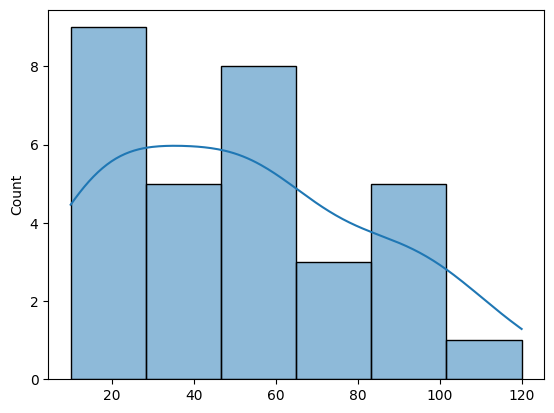

In [8]:
import pandas as pd
import seaborn as sns

data = pd.Series([10, 20, 20 , 40, 50, 60, 70, 60, 50, 40, 30, 20, 10, 10, 10, 20, 20, 30, 40, 50, 50, 60, 60, 80, 90, 100, 100, 120, 100, 90, 80])
sns.histplot(data, kde=True)

In [9]:
data.skew()

0.43087199198050025

In [10]:
data.kurt()

-0.823086089059716

<Axes: >

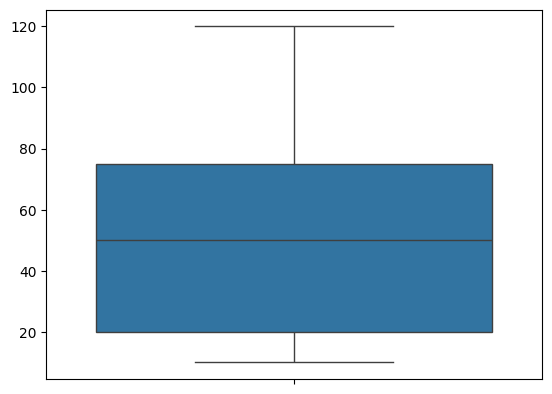

In [11]:
sns.boxplot(data)

In [12]:
data.mean(), data.median(), data.mode()

(51.29032258064516,
 50.0,
 0    20
 dtype: int64)

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Scaler/loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
df['NewFeature'] = (df["ApplicantIncome"]) + (3 * df["LoanAmount"]) + (7000 * df["Credit_History"])

df["Separator"] = df["NewFeature"].apply(lambda x: "High" if x > 0.25 * df["NewFeature"].mean() else "Low")

print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [19]:
vals = pd.crosstab(df['Separator'], df['Loan_Status'])
vals

Loan_Status,N,Y
Separator,,
High,156,372
Low,36,50


In [20]:
from scipy.stats import chi2_contingency

In [21]:
chi2_contingency(pd.crosstab(df['Separator'], df['Loan_Status']))

Chi2ContingencyResult(statistic=4.661356306711547, pvalue=0.030848813937153836, dof=1, expected_freq=array([[165.10749186, 362.89250814],
       [ 26.89250814,  59.10749186]]))

In [22]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
file_path = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/018/746/original/loan.csv?1666170299'
data = pd.read_csv(file_path)

# Drop rows with missing values
data = data.dropna()

# Create the 'NewFeature' using the linear combination of the given features
data['NewFeature'] = data["ApplicantIncome"] + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"])

# Calculate 0.25 times the mean of 'NewFeature'
threshold = 0.25 * data['NewFeature'].mean()

# Create the 'Separator' feature
data['Separator'] = data['NewFeature'] > threshold

# Create the contingency table between 'Loan_Status' and 'Separator'
contingency_table = pd.crosstab(data['Loan_Status'], data['Separator'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Round the p-value to four decimal places
p_value_rounded = round(p_value, 4)

p_value_rounded, contingency_table


(0.0001,
 Separator    False  True 
 Loan_Status              
 N               11    137
 Y                2    330)

In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,NewFeature,Separator
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,Low
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,11967.0,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,10198.0,High
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,9943.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,13423.0,High


In [24]:
df = df.dropna(subset=["Gender"])


In [25]:
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [27]:
import numpy as np
import pandas as pd

data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Scaler/loan.csv')
data=data.dropna()
data=data[data['Loan_Status']=='N']
#Check chi2_Contingency for female and credit history 1
from scipy.stats import chi2_contingency
#H0: female and credit history is independent
#H1: female and credit history is dependent
cross_tab=pd.crosstab(data['Gender'],data['Credit_History'])
cross_tab
chi2_contingency(cross_tab)
# Chi2ContingencyResult(statistic=0.0024123442480440483, pvalue=0.9608271544968046, dof=1, expected_freq=array([[13.62162162, 18.37837838],

Chi2ContingencyResult(statistic=0.0024123442480440483, pvalue=0.9608271544968046, dof=1, expected_freq=array([[13.62162162, 18.37837838],
       [49.37837838, 66.62162162]]))